In [1]:
import sys
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install pandas

  Using cached matplotlib-3.3.2-cp38-cp38-win_amd64.whl (8.5 MB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached kiwisolver-1.2.0-cp38-none-win_amd64.whl (58 kB)


You should consider upgrading via the 'd:\jojo\stuff\notebooks\scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'd:\jojo\stuff\notebooks\scripts\python.exe -m pip install --upgrade pip' command.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In linear regression, we are creating a linear function to calculate value $f(x)$ for a given $x$.

The equation is just like any linear equation, in the form of

$$
f(x) = mx + b
$$

But in linear-regression-speak, we write

$$
h_\theta(x) = \theta_0 + \theta_1x
$$

(this is not complete as we will see later, but it is easier to understand for now)

The steps of linear regression are

1. Pick some $\theta_{0}$ and $\theta_{1}$
2. Calculate $h_{\theta}(x)$ for every given sample of $x$
3. Compare the calculated value with the actual value.  Calculate the overall error level (known as cost function $J$)
   by using
   $$
     \frac1{2m}\sum_{i=1}^m(h_\theta(x)^{(i)} - y^{(i)})^2
   $$
   where    
   - $m$ is the number of training samples
   - $y$ is the actual value of training sample for a given $x$
   - $i$ is the index of the training sample
   - $x^{(i)}$ is the $x$ of the the training sample of index $i$
   - there is also $j$ and $n$, but we will get to them later
4. Minimize the cost function $J$

Start with a riduculous example of something even simpler, where we only have $\theta_0$.  This means our $x$ has no purpose:
$$
h_\theta = \theta_0
$$
Let's say our training set is

|x |y |
|--|--|
|0 |5 |
|1 |5 |
|2 |5 |

This means

- $m$ is 3
- $i$ goes from 1 to 3 (or maybe 0 to 2 in Python world)

In [3]:
training_x = np.array([0, 1, 2])
training_y = np.array([5, 5, 5])

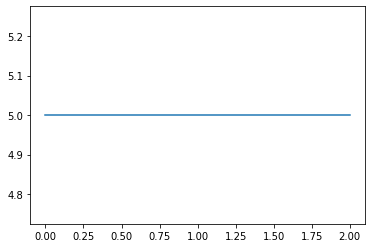

In [4]:
plt.plot(training_x, training_y)

And let's say we start with $\theta_0=0$

Our hypothesis would be

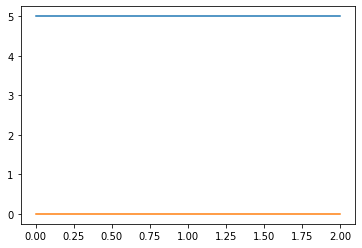

In [58]:
# we are using 0 * training_x just so we end up with an array, even though
# we said our hypothesis does not depend on x
def hypothesis_theta(theta):
    return theta + 0 * training_x

hypothesis = hypothesis_theta(0)
hypothesis
# visually, we can see our training set at 5 while our hypothesis is at 0
plt.plot(training_x, training_y)
plt.plot(training_x, hypothesis)

Our cost $J$ is

In [59]:
def cost(hypothesis):
    return np.sum((hypothesis - training_y) ** 2) / 2 / 3
cost(hypothesis)

12.5

And before we start doing our gradient descent to find minimum cost $J$, let's just plot $\theta_0$ vs $J$.

In [60]:
# theta 0
hypothesis_theta_0 = hypothesis_theta(0)
cost_theta_0 = cost(hypothesis_theta_0)
cost_theta_0

12.5

In [61]:
# theta 1
hypothesis_theta_1 = hypothesis_theta(1)
cost_theta_1 = cost(hypothesis_theta_1)
cost_theta_1

8.0

And so on... but to make it easier:

In [66]:
# try calculating cost for theta from 0 to 9
theta_list = np.arange(0, 10, 1)

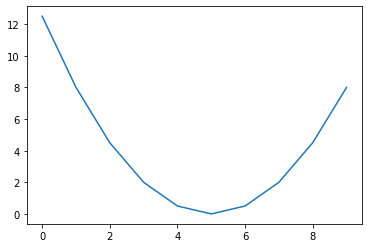

In [67]:
plt.plot(thetas, [cost(hypothesis_theta(theta)) for theta in theta_list])

And as seen here, we have minimum cost at $\theta_0 = 5$